In [7]:
import numpy as np
def RGB2LUV(image):
    copied_image = image.copy()
    width, height = copied_image.shape[:2]
    copied_image =copied_image /255.0
    for i in range(width):
        for j in range(height):
            x = 0.412453 * copied_image[i, j][0] + 0.357580 * copied_image[i, j][1] + 0.180423 * copied_image[i, j][2]
            y = 0.212671 * copied_image[i, j][0] + 0.715160 * copied_image[i, j][1] + 0.072169 * copied_image[i, j][2]
            z = 0.019334 * copied_image[i, j][0] + 0.119193 * copied_image[i, j][1] + 0.950227 * copied_image[i, j][2]
            if (y > 0.008856):
                L = (116.0 * (y **(1/3)) ) - 16.0
            else:
                L = 903.3 * y
            
            u_dash = 4.0*x /( x + (15.0*y ) + 3.0*z) 
            v_dash = 9.0*y /( x + (15.0*y ) + 3.0*z) 

            U = 13.0 * L * (u_dash -0.19793943)
            V = 13.0 * L * (v_dash -0.46831096)

            image [i,j] [0] = ( 255.0/100.0) *L
            image [i,j] [1] = ( 255.0/ 354.0) *(U+134.0 )
            image [i,j] [2] = (255.0/ 262.0) *(V +140.0) 
    return image.astype(np.uint8)

C:\Users\Shorouk Shawky\AppData\Local\Temp\ipykernel_19724\763486256.py:16: RuntimeWarning: invalid value encountered in double_scalars
  u_dash = 4.0*x /( x + (15.0*y ) + 3.0*z)
C:\Users\Shorouk Shawky\AppData\Local\Temp\ipykernel_19724\763486256.py:17: RuntimeWarning: invalid value encountered in double_scalars
  v_dash = 9.0*y /( x + (15.0*y ) + 3.0*z)


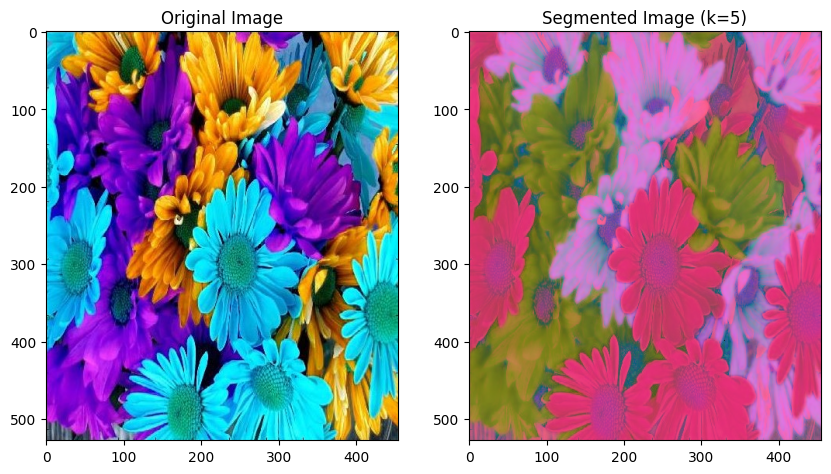

In [8]:
import matplotlib.pyplot as plt
import cv2
# Load the image
image = cv2.imread('images\kmeans_07.jpg')
cop_img = np.copy(image)
converted_image = RGB2LUV(image)

# Display the original image and the segmented image
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(cop_img)
axs[0].set_title('Original Image')
axs[1].imshow(converted_image)
axs[1].set_title('Segmented Image (k={})'.format(k))
plt.show()

In [14]:
import numpy as np

def rgb_to_luv(rgb_image):
    """
    Convert an RGB image to LUV color space.
    """
    # Define white reference values
    Xn = 0.95047
    Yn = 1.00000
    Zn = 1.09883
    
    # Normalize RGB values to [0, 1] range
    rgb_image = rgb_image.astype(np.float) / 255.0
    
    # Convert RGB to XYZ color space
    xyz_image = np.zeros(rgb_image.shape)
    xyz_image[:,:,0] = 0.4124564*rgb_image[:,:,0] + 0.3575761*rgb_image[:,:,1] + 0.1804375*rgb_image[:,:,2]
    xyz_image[:,:,1] = 0.2126729*rgb_image[:,:,0] + 0.7151522*rgb_image[:,:,1] + 0.0721750*rgb_image[:,:,2]
    xyz_image[:,:,2] = 0.0193339*rgb_image[:,:,0] + 0.1191920*rgb_image[:,:,1] + 0.9503041*rgb_image[:,:,2]
    
    # Convert XYZ to LUV color space
    luv_image = np.zeros(rgb_image.shape)
    luv_image[:,:,0] = np.where(xyz_image[:,:,1] > 0.008856, 116.0 * np.power(xyz_image[:,:,1]/Yn, 1/3.0) - 16.0, 903.3 * xyz_image[:,:,1])
    u_p = 4 * xyz_image[:,:,0] / (xyz_image[:,:,0] + 15*xyz_image[:,:,1] + 3*xyz_image[:,:,2])
    v_p = 9 * xyz_image[:,:,1] / (xyz_image[:,:,0] + 15*xyz_image[:,:,1] + 3*xyz_image[:,:,2])
    u_n = 4 * Xn / (Xn + 15*Yn + 3*Zn)
    v_n = 9 * Yn / (Xn + 15*Yn + 3*Zn)
    luv_image[:,:,1] = 13 * luv_image[:,:,0] * (u_p - u_n)
    luv_image[:,:,2] = 13 * luv_image[:,:,0] * (v_p - v_n)
    
    # Scale LUV values to [0, 255] range
    luv_image[:,:,0] = (255.0 / (np.max(luv_image[:,:,0]) - np.min(luv_image[:,:,0]))) * (luv_image[:,:,0] - np.min(luv_image[:,:,0]))
    luv_image[:,:,1] = (255.0 / (np.max(luv_image[:,:,1]) - np.min(luv_image[:,:,1]))) * (luv_image[:,:,1] - np.min(luv_image[:,:,1]))
    luv_image[:,:,2] = (255.0 / (np.max(luv_image[:,:,2]) - np.min(luv_image[:,:,2]))) * (luv_image[:,:,2] - np.min(luv_image[:,:,2]))
    
    # Convert LUV to uint8 data type
    luv_image = luv_image.astype(np.uint8)
    
    return luv_image


C:\Users\Shorouk Shawky\AppData\Local\Temp\ipykernel_19724\34460225.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rgb_image = rgb_image.astype(np.float) / 255.0


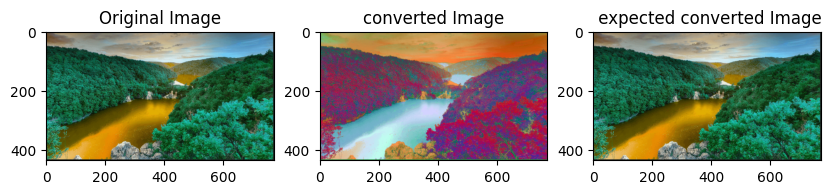

In [17]:
import cv2
rgb_img = cv2.imread('images/landscape.png')

cop_img = np.copy(rgb_img)
# Convert the RGB image to LUV using your implemented function
converted_image = rgb_to_luv(rgb_img)

# Load the expected LUV image (if available)
expected_luv_img = cv2.imread('images/landscape.png')

# # Compare the output LUV image to the expected result (if available)
# if expected_luv_img is not None:
#     difference = cv2.absdiff(converted_image, expected_luv_img)
#     if not cv2.countNonZero(difference):
#         print('The output LUV image matches the expected result')
#     else:
#         print('The output LUV image does not match the expected result')
# else:
#     print('Expected LUV image not available for comparison')



# Display the original image and the segmented image
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(cop_img)
axs[0].set_title('Original Image')
axs[1].imshow(converted_image)
axs[1].set_title('converted Image')
axs[2].imshow(expected_luv_img)
axs[2].set_title(' expected converted Image')

plt.show()


In [1]:
import numpy as np 
def kmeans_segmentation(image, k, max_iterations=100, threshold=1e-4):
    # Convert the image into a numpy array
    img = np.array(image)
    
    # Reshape the numpy array into a 2D array
    img_shape = img.shape
    img_2d = img.reshape(img_shape[0] * img_shape[1], img_shape[2])
    
    # Initialize k centroids randomly
    centroids = img_2d[np.random.choice(img_2d.shape[0], k, replace=False)]
    
    # Assign each pixel to the closest centroid
    labels = np.zeros(img_2d.shape[0])
    distances = np.zeros(k)
    for i in range(img_2d.shape[0]):
        for j in range(k):
            distances[j] = np.linalg.norm(img_2d[i] - centroids[j])
        labels[i] = np.argmin(distances)
    
    # Update centroids based on the mean of the assigned pixels
    for i in range(k):
        centroids[i] = np.mean(img_2d[labels == i], axis=0)
    
    # Repeat the above steps until convergence
    for i in range(max_iterations):
        new_labels = np.zeros(img_2d.shape[0])
        new_distances = np.zeros(k)
        for i in range(img_2d.shape[0]):
            for j in range(k):
                new_distances[j] = np.linalg.norm(img_2d[i] - centroids[j])
            new_labels[i] = np.argmin(new_distances)
        if np.array_equal(new_labels, labels):
            break
        
        # Check if the difference between the old and new centroids is less than the threshold value
        if np.sum(np.abs(centroids - np.array([np.mean(img_2d[new_labels == i], axis=0) for i in range(k)]))) < threshold:
            break
        
        labels = new_labels
        centroids = np.array([np.mean(img_2d[labels == i], axis=0) for i in range(k)])
    
    # Reshape the labels back to the original image shape
    labels = labels.reshape(img_shape[0], img_shape[1])
    
    return labels.astype(int)


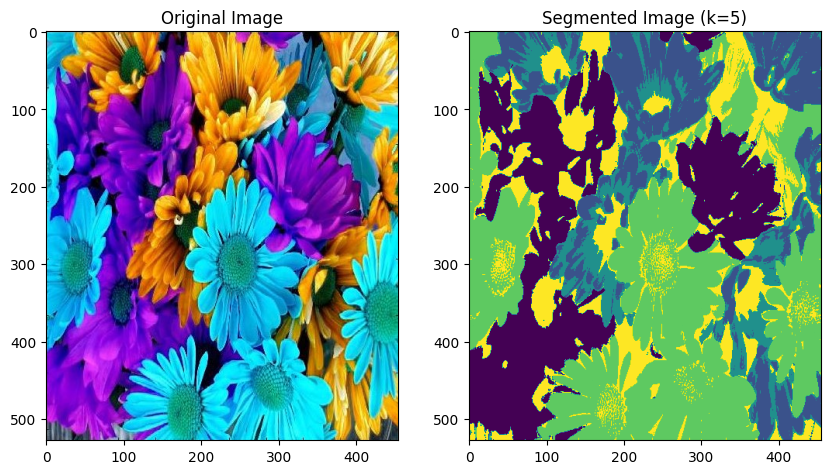

In [4]:
import matplotlib.pyplot as plt
import cv2
# Load the image
image = cv2.imread('images\kmeans_07.jpg')

# Perform image segmentation using K-means clustering with k=3
k = 5
segmented_image = kmeans_segmentation(image, k)

# Display the original image and the segmented image
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(segmented_image)
axs[1].set_title('Segmented Image (k={})'.format(k))
plt.show()

In [20]:
#regionGrow algorithm

import numpy as np
import matplotlib.pyplot as plt
import cv2

class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def getX(self):
        return self.x

    def getY(self):
        return self.y

def getGrayDiff(img, currentPoint, tmpPoint):
    return abs(int(img[currentPoint.x, currentPoint.y]) - int(img[tmpPoint.x, tmpPoint.y]))


def get_around_pixels():
    around = [Point(-1, -1), Point(0, -1), Point(1, -1),
                Point(1, 0), Point(1, 1), Point(0, 1),
                Point(-1, 1), Point(-1, 0)]
    return around

def regionGrow(img, seeds, thresh):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)

    label = 1
    rest_8pixels_in_kernel = get_around_pixels()

    while (len(seeds) > 0):
        currentPoint = seeds.pop(0)

        seedMark[currentPoint.x, currentPoint.y] = label

        for i in range(8):
            neighbor_x = currentPoint.x + rest_8pixels_in_kernel[i].x
            neighbor_y = currentPoint.y + rest_8pixels_in_kernel[i].y

            if neighbor_x < 0 or neighbor_y < 0 or neighbor_x >= height or neighbor_y >= weight:
                continue

            grayDiff = getGrayDiff(img, currentPoint, Point(neighbor_x, neighbor_y))

            if grayDiff < thresh and seedMark[neighbor_x, neighbor_y] == 0:
                seedMark[neighbor_x, neighbor_y] = label
                seeds.append(Point(neighbor_x, neighbor_y))

    return seedMark

def select_random_seed(img,seeds):
    for i in range(3):
        x = np.random.randint(0, img.shape[0])
        y = np.random.randint(0, img.shape[1])
        seeds.append(Point(x, y))

def apply_region_growing(source: np.ndarray):

    src = np.copy(source)
    color_img = cv2.cvtColor(src, cv2.COLOR_Luv2BGR)
    img_gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    global seeds
    seeds = []   
    select_random_seed(img_gray,seeds)
    output_image = regionGrow(img_gray, seeds, 10)

    return output_image

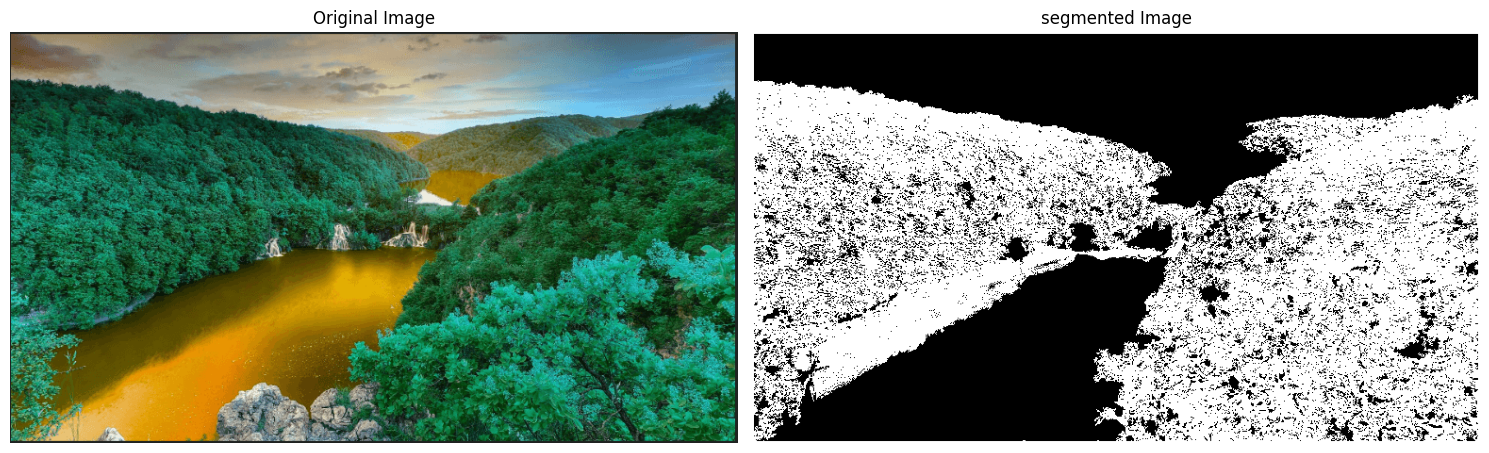

In [21]:
# Load the input image
import cv2 
import matplotlib.pyplot as plt


img = cv2.imread('images/landscape.png')
# b,g,r = cv2.split(img)       # get b,g,r
# img = cv2.merge([r,g,b])     # switch it to rgb

cop_img = np.copy(img)
segmented_image = apply_region_growing (img)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(cop_img)
ax[0].set_title('Original Image')
ax[0].set_axis_off()

ax[1].imshow(segmented_image ,cmap = "gray")
ax[1].set_title('segmented Image')
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

In [22]:

#Chat_GPT code with some EDITION
import numpy as np
import cv2

# Define the region growing function
def region_grow(image, seeds, threshold):
    # Get the dimensions of the image
    rows, cols, channels = image.shape

    # Create a binary mask to keep track of the pixels in the region
    mask = np.zeros((rows, cols), dtype=np.uint8)

    # Convert the image to LUV color space
    luv_image = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)

    # Get the L, U, and V channels
    L, U, V = cv2.split(luv_image)

    # Define the neighbors of a pixel
    neighbors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])

    # Initialize the queue with the seed pixels
    queue = list(seeds)

    # Process the queue until it is empty
    while len(queue) > 0:
        # Get the first pixel from the queue
        pixel = queue.pop(0)

        # Check if the pixel has already been added to the region
        if mask[pixel[0], pixel[1]] == 1:
            continue

        # Get the intensity values of the pixel
        intensity_L = float(L[pixel[0], pixel[1]])
        intensity_U = float(U[pixel[0], pixel[1]])
        intensity_V = float(V[pixel[0], pixel[1]])

        # Check if the pixel is similar enough to any of the seed pixels
        for seed in seeds:
            seed_L = float(L[seed[0], seed[1]])
            seed_U = float(U[seed[0], seed[1]])
            seed_V = float(V[seed[0], seed[1]])
            if abs(intensity_L - seed_L) <= threshold[0] and abs(intensity_U - seed_U) <= threshold[1] and abs(intensity_V - seed_V) <= threshold[2]:
                # Add the pixel to the region
                mask[pixel[0], pixel[1]] = 1

                # Add the neighbors of the pixel to the queue
                for neighbor in neighbors:
                    neighbor_pixel = pixel + neighbor
                    if neighbor_pixel[0] < 0 or neighbor_pixel[0] >= rows or neighbor_pixel[1] < 0 or neighbor_pixel[1] >= cols:
                        continue
                    queue.append(neighbor_pixel)


    return mask




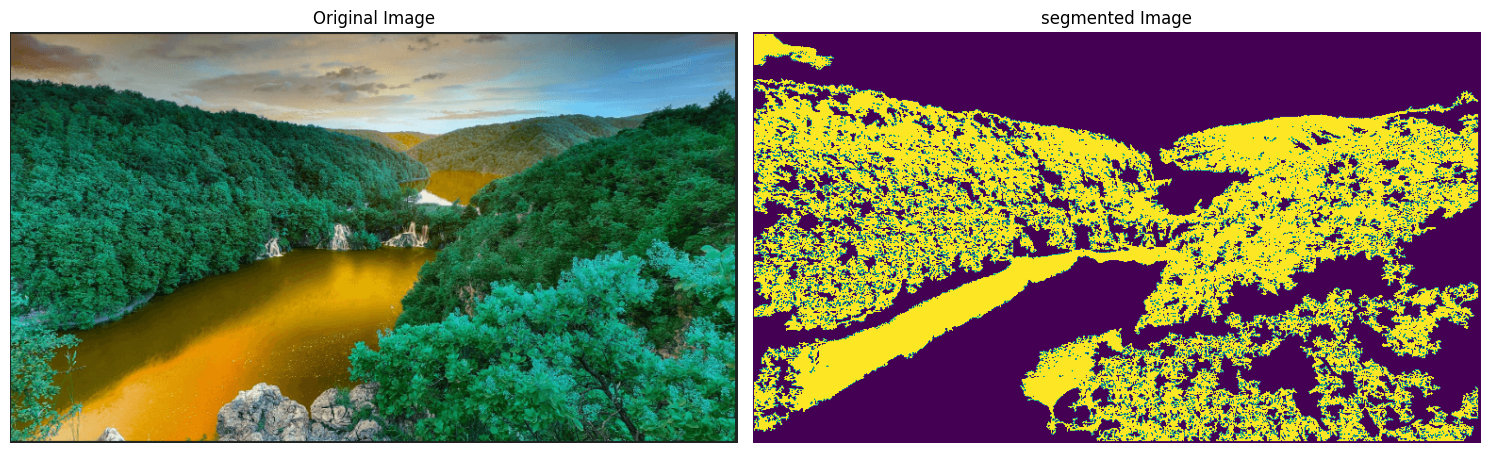

In [23]:
# Load the input image
img = cv2.imread('images\landscape.png')
cop_img = np.copy(img)
# Define the similarity threshold
threshold = (10, 30, 60, 150)

# Choose the seed points
seeds = [(10, 10), (100, 100), (200, 200),(400,400)]

# Apply region growing to the image
mask = region_grow(img, seeds, threshold)

# Display the result image
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(cop_img)
ax[0].set_title('Original Image')
ax[0].set_axis_off()

ax[1].imshow(mask )
ax[1].set_title('segmented Image')
ax[1].set_axis_off()

plt.tight_layout()
plt.show()